<a href="https://colab.research.google.com/github/ArturoSirvent/TFG_notebooks/blob/main/single_input/representacion_resultado_CNN_analisis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
import tensorflow as tf
import glob

In [ ]:
npy_dir="/content/drive/MyDrive/TFG arturo/npy archivos"
ground_dir="/content/drive/MyDrive/TFG arturo"
stats_dir="/content/drive/MyDrive/TFG arturo/stats_1/totals_con_escala"
os.chdir(npy_dir)
lista_elementos=glob.glob("[!gamma]*.npy")
#lista_elementos=["gamma_total.npy"] #cambio


In [ ]:
i=0
print(lista_elementos[i],end="\n")
# del datos #puede que esto ayude a algo?
datos=np.load(os.path.join(npy_dir,lista_elementos[i]))
nombre_aux=lista_elementos[i].replace(".npy","")
nombre_aux_suma_img="suma_total_"+nombre_aux
matrix_aux=sum(datos.copy())


electron.npy


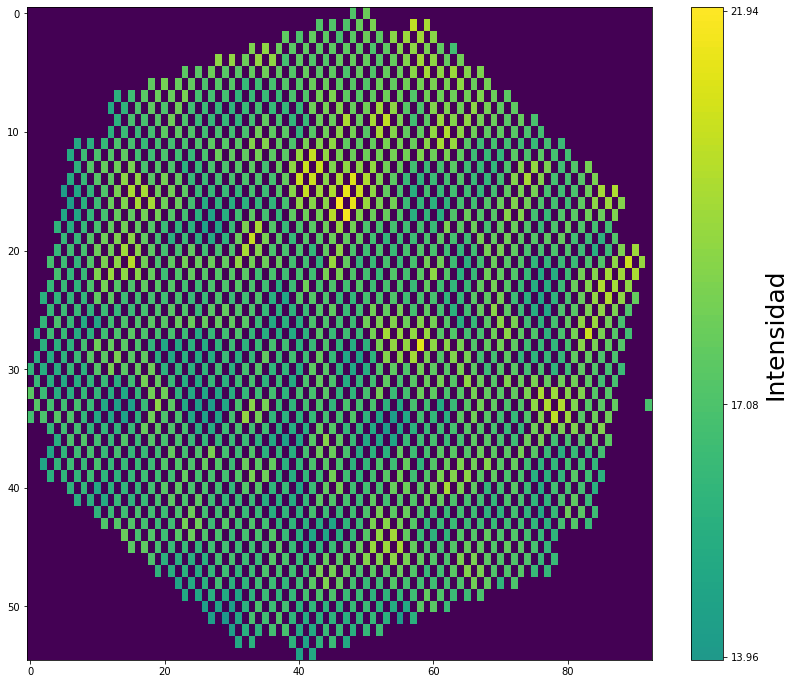

In [ ]:
plt.figure(figsize=(14,12)) #cambio
plt.imshow(matrix_aux,aspect="auto")

#vamos a poner el porcentaje que esta por encima de la media
matrix_aux_non0=matrix_aux[matrix_aux!=0]
min_aux=np.amin(matrix_aux_non0)
max_aux=np.amax(matrix_aux_non0)
media=np.mean(matrix_aux_non0.flatten())
#ahora necesitamos enlazar los colores del minimo que no es cero y del maximo, con los porcentajes
plt.colorbar(values=np.linspace(min_aux,max_aux,100),ticks=[0,min_aux,media,max_aux]).set_label(label='Intensidad',size=25)
plt.clim(min_aux/3,max_aux)

In [ ]:
#Para todas pero subplots
#para trabajar con el total
npy_dir="/content/drive/MyDrive/TFG arturo/npy archivos"
ground_dir="/content/drive/MyDrive/TFG arturo"
stats_dir="/content/drive/MyDrive/TFG arturo/stats_1/totals_con_escala"
os.chdir(npy_dir)
#lista_elementos=glob.glob("[!gamma]*.npy")
lista_elementos=["gamma_total.npy"]

for i in range(len(lista_elementos)):
  try:
    del datos
    del datos_aux
  except:
    pass
  print(lista_elementos[i],end="\n")
  # del datos #puede que esto ayude a algo?
  datos=np.load(os.path.join(npy_dir,lista_elementos[i]))
  nombre_aux=lista_elementos[i].replace(".npy","")
  nombre_aux_suma_img="suma_total_"+nombre_aux
  matrix_aux=sum(datos.copy())

  plt.figure(figsize=(17,14))
  plt.subplot(3,3,2)
  plt.imshow(matrix_aux,aspect="auto")
  #necesitamos la media de intensidad de aquellos que no son 0
  matrix_aux_non0=matrix_aux[matrix_aux!=0]
  min_aux=np.amin(matrix_aux_non0)
  max_aux=np.amax(matrix_aux_non0)
  media=np.mean(matrix_aux_non0.flatten())
  del matrix_aux_non0
  del matrix_aux
  plt.colorbar(values=np.linspace(min_aux,max_aux,100),ticks=[0,min_aux,media,max_aux]).set_label(label='Intensidad',size=10)
  plt.clim(min_aux/3,max_aux)
  plt.title(nombre_aux_suma_img,fontsize=14)
  #lo hacemos tambien para las indicendias totales, aquellas que superan un humbral

  #ahora calculamos los percentiles
  perc=["perc75","perc85","perc99.9"]
  vals_perc=[np.percentile(datos,75),np.percentile(datos,85),np.percentile(datos,99.9)]
  print(vals_perc)
  for j in range(len(perc)):
    datos_aux=datos.copy()
    
    nombre_aux_perc_img="suma_"+perc[j]+"_"+nombre_aux
    datos_aux[datos<vals_perc[j]]=0
    matrix_aux=sum(datos_aux)
    plt.subplot(3,3,4+j)
    matrix_aux_non0=matrix_aux[matrix_aux!=0]
    min_aux=np.amin(matrix_aux_non0)
    max_aux=np.amax(matrix_aux_non0)
    media=np.mean(matrix_aux_non0.flatten())
    plt.imshow(matrix_aux,aspect="auto")

    plt.colorbar(values=np.linspace(min_aux,max_aux,100),ticks=[0,min_aux,media,max_aux]).set_label(label='Intensidad',size=10)
    plt.clim(min_aux/3,max_aux)
    plt.title(nombre_aux_perc_img,fontsize=14)
    #lo hacemos tambien para las indicendias totales, aquellas que superan el percentil, las ponemos 
    #a valor 1 independientemente, y luego sumamos
    datos_aux=datos.copy()
    datos_aux[datos>=vals_perc[j]]=1.0
    datos_aux[datos<vals_perc[j]]=0
    matrix_aux=sum(datos_aux)
    nombre_aux_perc_img="incidencia_"+perc[j]+"_"+nombre_aux
    plt.subplot(3,3,7+j)
    matrix_aux_non0=matrix_aux[matrix_aux!=0]
    min_aux=np.amin(matrix_aux_non0)
    max_aux=np.amax(matrix_aux_non0)
    media=np.mean(matrix_aux_non0.flatten())
    plt.imshow(matrix_aux,aspect="auto")
    del matrix_aux_non0
    del matrix_aux
    plt.colorbar(values=np.linspace(min_aux,max_aux,100),ticks=[0,min_aux,media,max_aux]).set_label(label='Fotones incidentes',size=10)
    plt.clim(min_aux/3,max_aux)
    plt.title(nombre_aux_perc_img,fontsize=14)
  plt.tight_layout()
  plt.savefig(os.path.join(stats_dir,nombre_aux)+"_con_escala.png")
  plt.close()

gamma_total.npy
[0.0003813397737384009, 0.0010804626922588025, 0.12927042923288698]


In [ ]:
#para trabajar con cada RUN
npy_dir="/content/drive/MyDrive/TFG arturo/npy archivos"
ground_dir="/content/drive/MyDrive/TFG arturo"
stats_dir="/content/drive/MyDrive/TFG arturo/stats_1/per_run_seleccion_con_escala"
each_run_dir=os.path.join(npy_dir,"each_run")
#el número de eventos por cada RUN varía y deben tomarse los datos de la carpeta each_run
#donde hay un npy por cada run
os.chdir(each_run_dir)
lista_elementos_each_RUN=glob.glob("*.npy")
for i in range(len(lista_elementos_each_RUN)):
  #para reducir un poco la cantidad de datos, vamos a escoger solo cada 3
  if (i%3 ==0):
    #print(i,end="\n")
    plt.figure(figsize=(17,14))
    datos=np.load(os.path.join(each_run_dir,lista_elementos_each_RUN[i]))
    nombre_aux=lista_elementos_each_RUN[i].replace(".npy","")
    nombre_aux_suma_img="suma_total_"+nombre_aux+".png"
    matrix_aux=sum(datos)
    plt.subplot(3,3,2)
    plt.imshow(matrix_aux,aspect="auto")
    matrix_aux_non0=matrix_aux[matrix_aux!=0]
    min_aux=np.amin(matrix_aux_non0)
    max_aux=np.amax(matrix_aux_non0)
    media=np.mean(matrix_aux_non0.flatten())
    plt.colorbar(values=np.linspace(min_aux,max_aux,100),ticks=[0,min_aux,media,max_aux]).set_label(label='Intensidad',size=10)
    plt.clim(min_aux/3,max_aux)
    plt.title(nombre_aux_suma_img,fontsize=14)
    plt.title(nombre_aux_suma_img,fontsize=14)
    #plt.savefig(os.path.join(stats_dir,nombre_aux_suma_img))
    #plt.close()
    #lo hacemos tambien para las indicendias totales, aquellas que superan un humbral

    #ahora calculamos los percentiles
    perc=["perc75","perc85","perc99.9"]
    vals_perc=[np.percentile(datos,75),np.percentile(datos,85),np.percentile(datos,99.9)]
    for j in range(len(perc)):
      nombre_aux_perc_img="suma_"+perc[j]+"_"+nombre_aux+".png"
      datos_aux=datos.copy()
      datos_aux[datos<vals_perc[j]]=0
      matrix_aux=sum(datos_aux)
      plt.subplot(3,3,j+4)
      plt.imshow(matrix_aux,aspect="auto")
      matrix_aux_non0=matrix_aux[matrix_aux!=0]
      min_aux=np.amin(matrix_aux_non0)
      max_aux=np.amax(matrix_aux_non0)
      media=np.mean(matrix_aux_non0.flatten())
      plt.colorbar(values=np.linspace(min_aux,max_aux,100),ticks=[0,min_aux,media,max_aux]).set_label(label='Fotones incidentes',size=10)
      plt.clim(min_aux/3,max_aux)
      plt.title(nombre_aux_perc_img,fontsize=14)

      #lo hacemos tambien para las indicendias totales, aquellas que superan el percentil, las ponemos 
      #a valor 1 independientemente, y luego sumamos
      datos_aux=datos.copy()
      datos_aux[datos>=vals_perc[j]]=1
      datos_aux[datos<vals_perc[j]]=0
      matrix_aux=sum(datos_aux)
      nombre_aux_perc_img="incidencia_"+perc[j]+"_"+nombre_aux+".png"

      plt.subplot(3,3,j+7)
      plt.imshow(matrix_aux,aspect="auto")
      matrix_aux_non0=matrix_aux[matrix_aux!=0]
      min_aux=np.amin(matrix_aux_non0)
      max_aux=np.amax(matrix_aux_non0)
      media=np.mean(matrix_aux_non0.flatten())
      plt.colorbar(values=np.linspace(min_aux,max_aux,100),ticks=[0,min_aux,media,max_aux]).set_label(label='Fotones incidentes',size=10)
      plt.clim(min_aux/3,max_aux)
      plt.title(nombre_aux_perc_img,fontsize=14)

    plt.tight_layout()
    plt.savefig(os.path.join(stats_dir,lista_elementos_each_RUN[i].replace(".npy","")+"_con_escala.png"))
    print("\includegraphics[width=17 cm]{"+lista_elementos_each_RUN[i].replace(".npy","")+"_con_escala.png"+"}")
    plt.close()

In [ ]:
for i in ["gamma_total","electron","helium", "proton","iron","silicon","nitrogen"]:
  aux="\includegraphics[width=17 cm]{"+str(i)+"_con_escala.png} \n"
  print(aux)

\includegraphics[width=17 cm]{gamma_total_con_escala.png} 

\includegraphics[width=17 cm]{electron_con_escala.png} 

\includegraphics[width=17 cm]{helium_con_escala.png} 

\includegraphics[width=17 cm]{proton_con_escala.png} 

\includegraphics[width=17 cm]{iron_con_escala.png} 

\includegraphics[width=17 cm]{silicon_con_escala.png} 

\includegraphics[width=17 cm]{nitrogen_con_escala.png} 



In [ ]:
#para trabajar con cada RUN
npy_dir="/content/drive/MyDrive/TFG arturo/npy archivos"
ground_dir="/content/drive/MyDrive/TFG arturo"
stats_dir="/content/drive/MyDrive/TFG arturo/stats_1/per_run_seleccion_con_escala"
each_run_dir=os.path.join(npy_dir,"each_run")
#el número de eventos por cada RUN varía y deben tomarse los datos de la carpeta each_run
#donde hay un npy por cada run
os.chdir(each_run_dir)
lista_elementos_each_RUN=glob.glob("*.npy")
for i in range(len(lista_elementos_each_RUN)):
  #para reducir un poco la cantidad de datos, vamos a escoger solo cada 3
  if (i%3 ==0):
    #print(i,end="\n")
    plt.figure(figsize=(17,14))
    datos=np.load(os.path.join(each_run_dir,lista_elementos_each_RUN[i]))
    nombre_aux=lista_elementos_each_RUN[i].replace(".npy","")
    nombre_aux_suma_img="suma_total_"+nombre_aux+".png"

    #ahora calculamos los percentiles
    perc=["perc75","perc85","perc99.9"]
    vals_perc=[np.percentile(datos,75),np.percentile(datos,85),np.percentile(datos,99.9)]
    for j in range(len(perc)):
      nombre_aux_perc_img="suma_"+perc[j]+"_"+nombre_aux+".png"
      

      #lo hacemos tambien para las indicendias totales, aquellas que superan el percentil, las ponemos 
      #a valor 1 independientemente, y luego sumamos

      nombre_aux_perc_img="incidencia_"+perc[j]+"_"+nombre_aux+".png"


    print("\includegraphics[width=17 cm]{"+lista_elementos_each_RUN[i].replace(".npy","")+"_con_escala.png"+"}")
